In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,1,1,2,0,0,0.0,3,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0.0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,7
3,2,2,2,1,0,0.0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,7
4,2,2,1,0,0,0.0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,70
355,2,2,2,1,0,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,70
356,2,1,0,3,0,NaN,0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
float64		column 6	35
int64		column 7	0
float64		column 8	141
float64		column 9	141
float64		column 10	141
int64		column 11	0
float64		column 12	141
int64		column 13	0
int64		column 14	0
int64		column 15	0
float64		column 16	141
int64		column 17	0
int64		column 18	0
float64		column 19	35
int64		column 20	0
float64		column 21	141
float64		column 22	141
float64		column 23	106
float64		column 24	141
float64		column 25	141
float64		column 26	106
float64		column 27	141
float64		column 28	141
float64		column 29	141
float64		column 30	141
float64		column 31	141
int64		column 32	0
float64		column 33	141
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,323.000000,358.000000,217.000000,217.000000,217.000000,...,217.000000,252.000000,217.000000,217.000000,217.000000,217.000000,217.000000,358.000000,217.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.455108,0.170391,0.437788,0.520737,0.433180,...,0.451613,0.464286,0.520737,0.967742,0.516129,0.064516,0.064516,1.877095,0.645161,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.962171,0.576394,0.875093,0.943194,0.858727,...,0.891685,0.867011,1.000363,1.111335,0.995810,0.367025,0.367025,0.699324,1.181801,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.250000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

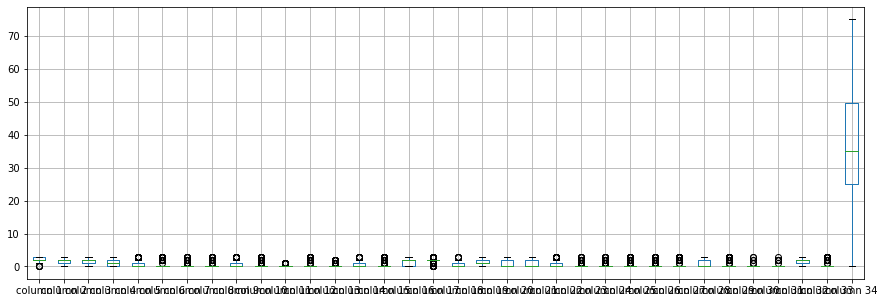

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.455108
column 7      0.170391
column 8      0.437788
column 9      0.520737
column 10     0.433180
column 11     0.122905
column 12     0.460829
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.433180
column 17     1.955307
column 18     0.511173
column 19     1.275542
column 20     0.662011
column 21     0.963134
column 22     0.571429
column 23     0.285714
column 24     0.290323
column 25     0.451613
column 26     0.464286
column 27     0.520737
column 28     0.967742
column 29     0.516129
column 30     0.064516
column 31     0.064516
column 32     1.877095
column 33     0.645161
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.036404,-0.115275,0.018736,0.179954,0.207960,...,0.039491,0.175839,0.061896,0.015060,0.062646,0.037311,0.037311,0.093026,0.053155,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.077615,-0.098665,-0.074241,0.351746,0.331776,...,-0.046130,0.246352,-0.084574,-0.009064,-0.086406,0.019441,0.019441,-0.008453,-0.104772,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.319628,-0.176715,0.272626,0.324375,0.269455,...,0.285936,0.345504,0.269712,-0.212489,0.237809,-0.035392,-0.077590,0.124812,0.261399,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.413066,-0.144027,0.378367,-0.358111,-0.184835,...,0.384443,-0.209865,0.380839,0.002239,0.396335,-0.157392,-0.168456,0.051553,0.414873,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.351605,-0.175676,0.389127,-0.080656,0.008054,...,0.393705,-0.030030,0.332169,0.048302,0.362625,-0.125620,-0.125620,0.110295,0.357108,0.081162
column 6,0.036404,-0.077615,0.319628,0.413066,0.351605,1.000000,-0.138123,0.895660,-0.289907,-0.248931,...,0.906698,-0.132642,0.936231,0.113849,0.906259,-0.092302,-0.092302,0.222715,0.930392,0.086205
column 7,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.138123,1.000000,-0.114512,0.139421,-0.052000,...,-0.115930,-0.131383,-0.119152,0.026260,-0.118637,0.731908,0.791304,-0.093833,-0.115735,-0.371368
column 8,0.018736,-0.074241,0.272626,0.378367,0.389127,0.895660,-0.114512,1.000000,-0.277481,-0.253530,...,0.908337,-0.109314,0.870121,0.166922,0.865800,-0.088346,-0.088346,0.236180,0.902972,0.050582
column 9,0.179954,0.351746,0.324375,-0.358111,-0.080656,-0.289907,0.139421,-0.277481,1.000000,0.674774,...,-0.280918,0.524402,-0.288725,-0.412323,-0.287479,0.143227,0.169975,0.038841,-0.294487,-0.142450
column 10,0.207960,0.331776,0.269455,-0.184835,0.008054,-0.248931,-0.052000,-0.253530,0.674774,1.000000,...,-0.250623,0.492999,-0.247635,-0.407341,-0.246422,-0.074393,-0.059704,0.117415,-0.258410,-0.035731


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+77,34+77+77,34+77+77+77,34+77+77+77+77,34+77+77+77+77+77,34+77+77+77+77+77+77,34+77+77+77+77+77+77+77,34+77+77+77+77+77+77,34+77+77+77+77+77,34+77+77+77+77,34+77+77+77,34+77+77,34+77,34], vae_layer = False, seed = 77)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 69.37229243191805
Epoch: 1 , loss: 69.55936900052157
Epoch: 2 , loss: 68.87481186606668
Epoch: 3 , loss: 69.22162316062234
Epoch: 4 , loss: 68.51390977339311
Epoch: 5 , loss: 65.94730082425204
Epoch: 6 , loss: 64.72335954145952
Epoch: 7 , loss: 63.729524785822086
Epoch: 8 , loss: 63.00322341918945
Epoch: 9 , loss: 62.46043378656561
Epoch: 10 , loss: 61.88395864313299
Epoch: 11 , loss: 61.50926520607688
Epoch: 12 , loss: 61.30782092701305
Epoch: 13 , loss: 60.602120659568094
Epoch: 14 , loss: 60.836521495472304
Epoch: 15 , loss: 60.58978392861106
Epoch: 16 , loss: 60.2264272516424
Epoch: 17 , loss: 59.65085012262518
Epoch: 18 , loss: 59.34826001253995
Epoch: 19 , loss: 59.14026728543368
Epoch: 20 , loss: 59.03741663152521
Epoch: 21 , loss: 58.681474685668945
Epoch: 22 , loss: 57.80432614413175
Epoch: 23 , loss: 57.767590436068446
Epoch: 24 , loss: 57.06535547429865
Epoch: 25 , loss: 55.91300548206676
Ep

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.611540
column 9      0.145148
column 10    -0.053025
column 11     0.000000
column 12     0.618766
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.500555
column 17     1.000000
column 18     1.000000
column 19     1.041396
column 20     0.000000
column 21     0.620620
column 22     0.104069
column 23     0.000000
column 24     0.000861
column 25     0.550464
column 26     0.166430
column 27     0.585594
column 28     1.056415
column 29     0.581203
column 30    -0.045781
column 31    -0.024122
column 32     1.000000
column 33     0.748295
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0.000000,0,0.699256,-1.673643,-1.832640,...,0.664225,0.417239,0.545038,1.415529,0.646099,0.022771,-0.035202,0,-1.162328,0
1,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
2,0,0,0,0,0,0.000000,0,0.524099,-1.829012,-0.018564,...,0.530853,0.071733,0.573555,-1.094259,0.510829,-3.023987,-3.017859,0,0.709327,0
3,0,0,0,0,0,0.000000,0,0.445458,-1.755737,-1.876516,...,0.431164,0.330854,0.430007,-1.308525,0.385167,-2.044752,-1.994259,0,0.538459,0
4,0,0,0,0,0,0.000000,0,0.587689,-1.910388,0.017898,...,0.586715,0.180065,0.575313,-1.902835,0.608173,-2.008966,-2.057339,0,0.761830,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
354,0,0,0,0,0,0.000000,0,1.092440,-2.746225,-1.983456,...,1.069644,0.256248,1.008248,1.394058,1.039505,-0.082167,-0.046039,0,1.304234,0
355,0,0,0,0,0,0.000000,0,0.361301,0.139695,0.020773,...,0.331066,0.133722,0.299365,-1.293702,0.328575,-0.033100,-0.009073,0,0.460149,0
356,0,0,0,0,0,0.683303,0,0.772525,0.338842,0.107738,...,0.764118,0.000000,0.761197,1.410340,0.802840,-0.067875,-0.061497,0,0.970617,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(49.28698512545211, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.06501618445653021

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.426685
column 9      0.267524
column 10     0.095042
column 11     0.000000
column 12     0.361054
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     1.121071
column 17     2.000000
column 18     0.000000
column 19     0.901807
column 20     0.000000
column 21     0.629664
column 22     0.074391
column 23     0.000000
column 24     0.042790
column 25     0.363237
column 26     0.165729
column 27     0.430663
column 28     0.590153
column 29     0.449653
column 30    -0.035879
column 31    -0.026146
column 32     2.000000
column 33     0.472656
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.000000,0,0.699256,0.326357,0.167360,...,0.664225,0.417239,0.545038,1.415529,0.646099,0.022771,-0.035202,0,0.837672,0
1,1,1,2,0,0,0.000000,3,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2,0.000000,7
2,2,2,1,0,0,0.000000,3,0.524099,0.170988,-0.018564,...,0.530853,0.071733,0.573555,0.905741,0.510829,-0.023987,-0.017859,2,0.709327,7
3,2,2,2,1,0,0.000000,2,0.445458,0.244263,0.123484,...,0.431164,0.330854,0.430007,0.691475,0.385167,-0.044752,0.005741,2,0.538459,7
4,2,2,1,0,0,0.000000,2,0.587689,0.089612,0.017898,...,0.586715,0.180065,0.575313,1.097165,0.608173,-0.008966,-0.057339,2,0.761830,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.000000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3,0.000000,70
354,2,3,2,0,0,0.000000,0,1.092440,0.253775,0.016544,...,1.069644,0.256248,1.008248,1.394058,1.039505,-0.082167,-0.046039,1,1.304234,70
355,2,2,2,1,0,0.000000,0,0.361301,0.139695,0.020773,...,0.331066,0.133722,0.299365,0.706298,0.328575,-0.033100,-0.009073,2,0.460149,70
356,2,1,0,3,0,0.683303,0,0.772525,0.338842,0.107738,...,0.764118,0.000000,0.761197,1.410340,0.802840,-0.067875,-0.061497,1,0.970617,70


In [20]:
imputations[-1].to_excel("DERM_AN_20(imp).xlsx", index=False, header=False)